In [60]:
l = []
for f in fonts:
    font = fm.FontProperties(fname=f)
    l.append((f, font.get_name(), font.get_family()))
df = pd.DataFrame(l, columns=['path', 'name', 'family'])
df[df['path'].apply(lambda s: 'ipa' in s)]

,path,name,family
1,/root/.fonts/ipaexg.ttf,IPAexGothic,[ipag]
20,/root/.fonts/ipag.ttf,IPAGothic,[ipag]


In [1]:
# http://qiita.com/hik0107/items/de5785f680096df93efa
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt

# Jupyter上に図を表示するためのおまじない
%matplotlib inline

# データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt

# チャートがきれいになるおまじない
plt.style.use('ggplot') 

# 日本語化
#font = {'family' : 'ipag'}
#matplotlib.rc('font', **font)
#from matplotlib.font_manager import FontProperties
#fp = FontProperties(fname=r'~/.fonts/ipag.ttf', size=14)

In [121]:
### csvファイルのPATHを設定
csv_path='csv/Achievement.csv'

### ファイルの作成
strs = """Name,English,Mathematics,Science
Taro,75,90,85
Hanako,100,85,80
"""

f = open(csv_path, 'w')
f.writelines(strs)
f.close

### ファイルの中身確認
f = open(csv_path, "r")
for line in f:
    print(line, end="")
print("\n")

### pandasで読み込んで出力
df = pd.read_csv(csv_path)
df

Name,English,Mathematics,Science
Taro,75,90,85
Hanako,100,85,80




,Name,English,Mathematics,Science
0,Taro,75,90,85
1,Hanako,100,85,80


In [3]:
### csvファイルのPATHを設定
csv_path='csv/Temperature.csv'

### ファイルの作成
strs = """Date,Tokushima,Naruto,Anan
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3
"""

f = open(csv_path, 'w')
f.writelines(strs)
f.close

### ファイルの中身確認
f = open(csv_path, "r")
for line in f:
    print(line, end="")

Date,Tokushima,Naruto,Anan
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3


## CSVを読み取ったまま出力

In [124]:
df = pd.read_csv(csv_path)
df

,Date,Tokushima,Naruto,Anan
0,2020-01-01,5,6,3
1,2020-01-02,6,8,4
2,2020-01-03,9,10,6
3,2020-01-04,4,5,2
4,2020-01-05,5,6,3


## index_colを変えて出力

* indexとする列を指定する
    * 数値で指定すると、指定した列がindexになる
    * []で複数指定できる

In [125]:
df = pd.read_csv(csv_path, index_col=0)
df

,Tokushima,Naruto,Anan
Date,,,
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3


In [65]:
df = pd.read_csv(csv_path, index_col=1)
df

,Date,Naruto,Anan
Tokushima,,,
5,2020-01-01,6,3
6,2020-01-02,8,4
9,2020-01-03,10,6
4,2020-01-04,5,2
5,2020-01-05,6,3


In [66]:
df = pd.read_csv(csv_path, index_col=2)
df

,Date,Tokushima,Anan
Naruto,,,
6,2020-01-01,5,3
8,2020-01-02,6,4
10,2020-01-03,9,6
5,2020-01-04,4,2
6,2020-01-05,5,3


In [126]:
df = pd.read_csv(csv_path, index_col=[0,2])
df

,,Tokushima,Anan
Date,Naruto,,
2020-01-01,6,5,3
2020-01-02,8,6,4
2020-01-03,10,9,6
2020-01-04,5,4,2
2020-01-05,6,5,3


## headerを変えて出力

* 指定した行がheaderになる
* 複数行をheaderとして扱う場合は[]を使う
    * 一つだけなのに[]を使うと値がNaNになる
    * 行を飛び飛びで指定すると、headerに指定されなかった行は除去される

In [127]:
df = pd.read_csv(csv_path, header=0)
df

,Date,Tokushima,Naruto,Anan
0,2020-01-01,5,6,3
1,2020-01-02,6,8,4
2,2020-01-03,9,10,6
3,2020-01-04,4,5,2
4,2020-01-05,5,6,3


In [96]:
df = pd.read_csv(csv_path, header=[0])
df

,Date,Tokushima,Naruto,Anan
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [101]:
df = pd.read_csv(csv_path, header=1)
df

,2020-01-01,5,6,3
0,2020-01-02,6,8,4
1,2020-01-03,9,10,6
2,2020-01-04,4,5,2
3,2020-01-05,5,6,3


In [98]:
df = pd.read_csv(csv_path, header=[1])
df

,2020-01-01,5,6,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [104]:
df = pd.read_csv(csv_path, header=[0, 1])
df

,Date,Tokushima,Naruto,Anan
,2020-01-01,5,6,3
0,2020-01-02,6,8,4
1,2020-01-03,9,10,6
2,2020-01-04,4,5,2
3,2020-01-05,5,6,3


In [103]:
df = pd.read_csv(csv_path, header=[0, 1, 2])
df

,Date,Tokushima,Naruto,Anan
,2020-01-01,5,6,3
,2020-01-02,6,8,4
0,2020-01-03,9,10,6
1,2020-01-04,4,5,2
2,2020-01-05,5,6,3


In [102]:
df = pd.read_csv(csv_path, header=[0, 2, 4])
df

,Date,Tokushima,Naruto,Anan
,2020-01-02,6,8,4
,2020-01-04,4,5,2
0,2020-01-05,5,6,3


## skiprowsを変えて出力

* 指定した行をスキップする
    * 数値で指定すると、上から指定した行数飛ばして読み込む
    * []で複数指定すると、指定した行だけスキップする

In [109]:
df = pd.read_csv(csv_path, skiprows=0)
df

,Date,Tokushima,Naruto,Anan
0,2020-01-01,5,6,3
1,2020-01-02,6,8,4
2,2020-01-03,9,10,6
3,2020-01-04,4,5,2
4,2020-01-05,5,6,3


In [113]:
df = pd.read_csv(csv_path, skiprows=1)
df

,2020-01-01,5,6,3
0,2020-01-02,6,8,4
1,2020-01-03,9,10,6
2,2020-01-04,4,5,2
3,2020-01-05,5,6,3


In [115]:
df = pd.read_csv(csv_path, skiprows=2)
df

,2020-01-02,6,8,4
0,2020-01-03,9,10,6
1,2020-01-04,4,5,2
2,2020-01-05,5,6,3


In [114]:
df = pd.read_csv(csv_path, skiprows=[0])
df

,2020-01-01,5,6,3
0,2020-01-02,6,8,4
1,2020-01-03,9,10,6
2,2020-01-04,4,5,2
3,2020-01-05,5,6,3


In [112]:
df = pd.read_csv(csv_path, skiprows=[1])
df

,Date,Tokushima,Naruto,Anan
0,2020-01-02,6,8,4
1,2020-01-03,9,10,6
2,2020-01-04,4,5,2
3,2020-01-05,5,6,3


In [120]:
df = pd.read_csv(csv_path, skiprows=[2,4])
df

,Date,Tokushima,Naruto,Anan
0,2020-01-01,5,6,3
1,2020-01-03,9,10,6
2,2020-01-05,5,6,3


## 棒グラフで描画するようのデータに成形する

* index_colは日付を利用
* Tokushima, Narutoのみ使う
* 徳島,鳴門と漢字にする
* index(Date)列はdatetime型に変換する

In [129]:
df = pd.read_csv(csv_path)
df

,Date,Tokushima,Naruto,Anan
0,2020-01-01,5,6,3
1,2020-01-02,6,8,4
2,2020-01-03,9,10,6
3,2020-01-04,4,5,2
4,2020-01-05,5,6,3


In [131]:
df = pd.read_csv(csv_path, index_col=0)
df

,Tokushima,Naruto,Anan
Date,,,
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3


In [136]:
df = pd.read_csv(csv_path, index_col=0)

# 1列目(index_col=0で指定された列Date)はindexなのでiloc[0]はDateではなくTokushimaになる
df = df.iloc[:, [0, 1]]
df

,Tokushima,Naruto
Date,,
2020-01-01,5,6
2020-01-02,6,8
2020-01-03,9,10
2020-01-04,4,5
2020-01-05,5,6


In [138]:
df = pd.read_csv(csv_path, index_col=0)

df = df.iloc[:, [0, 1]]
df.columns = [u'徳島', u'鳴門']
df

,徳島,鳴門
Date,,
2020-01-01,5,6
2020-01-02,6,8
2020-01-03,9,10
2020-01-04,4,5
2020-01-05,5,6


In [4]:
df = pd.read_csv(csv_path, index_col=0)

df = df.iloc[:, [0, 1]]
df.columns = [u'徳島', u'鳴門']
df.index = pd.to_datetime(df.index)
df

,徳島,鳴門
Date,,
2020-01-01,5,6
2020-01-02,6,8
2020-01-03,9,10
2020-01-04,4,5
2020-01-05,5,6


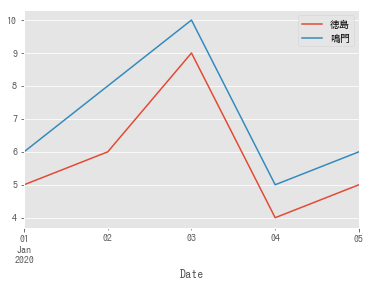

In [5]:
df.plot()